In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [61]:
def correlation_sum(corr_mat):
    assert corr_mat.shape[0] == corr_mat.shape[1]
    corr_mat_abs = np.absolute(corr_mat)
    sums = np.sum(corr_mat_abs, axis=1) - corr_mat_abs.diagonal() # axis doen't matter
    sums /= (corr_mat.shape[0]-1)
    return sums

In [55]:
barlow_train = pd.read_csv('../cifar10_-home-david-Downloads-dye9qi27_train_corr.csv',header=None)
barlow_val = pd.read_csv('../cifar10_-home-david-Downloads-dye9qi27_val_corr.csv',header=None)

lin_pred_min_train = pd.read_csv('../cifar10_-home-david-Downloads-gqvmpfko_train_corr.csv',header=None)
lin_pred_min_val = pd.read_csv('../cifar10_-home-david-Downloads-gqvmpfko_val_corr.csv',header=None)



In [57]:
lin_pred_min_val.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.000593,0.001286,0.016581,0.002280,0.011641,0.005696,-0.003216,0.006012,0.008867,0.002292,...,-0.007005,0.006806,0.012754,0.011452,0.008068,-0.003260,0.005653,0.006787,0.023131,0.012476
std,0.100292,0.061342,0.113266,0.090124,0.084949,0.147919,0.114939,0.099814,0.080643,0.072173,...,0.088676,0.119982,0.093958,0.126660,0.106370,0.098493,0.112067,0.086977,0.085965,0.105040
min,-0.249655,-0.079571,-0.265820,-0.222493,-0.178243,-0.345106,-0.302907,-0.190521,-0.151949,-0.171938,...,-0.136213,-0.246960,-0.231297,-0.291885,-0.305987,-0.182743,-0.248231,-0.161706,-0.160858,-0.232193
25%,-0.063681,-0.026675,-0.068480,-0.049964,-0.039644,-0.095474,-0.082976,-0.060111,-0.039502,-0.035938,...,-0.053184,-0.076278,-0.049178,-0.065128,-0.051910,-0.055636,-0.066664,-0.048314,-0.028558,-0.052250
50%,-0.009149,-0.010846,0.006694,0.000603,0.002011,-0.014978,-0.012863,-0.007406,0.000625,-0.009026,...,-0.029755,-0.015266,0.006230,0.008066,-0.001376,-0.031190,-0.007977,-0.006922,0.015173,-0.002228
75%,0.056701,0.016244,0.084329,0.052993,0.055300,0.089070,0.068514,0.058059,0.044945,0.025395,...,0.009413,0.067323,0.070945,0.072045,0.058270,0.017431,0.051129,0.047523,0.062803,0.066518
max,0.999999,1.000017,1.000024,0.999994,0.999988,1.000023,0.999999,0.999998,0.999973,1.000089,...,1.000010,1.000001,0.999995,0.999996,1.000019,0.999962,1.000034,1.000002,1.000010,0.999985


In [58]:
barlow_val.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.010509,0.009911,-0.000643,0.013724,0.007895,0.008547,0.006937,0.010742,0.003664,0.003649,...,0.005974,0.012101,0.001612,0.013017,0.011966,0.000202,0.001974,0.000613,0.013245,0.016690
std,0.086949,0.096886,0.088290,0.103597,0.078844,0.080082,0.086545,0.084503,0.081155,0.098921,...,0.071711,0.091539,0.084428,0.073337,0.085668,0.096031,0.067737,0.091612,0.075579,0.081558
min,-0.203447,-0.155849,-0.176331,-0.134341,-0.173707,-0.165230,-0.213549,-0.306658,-0.160346,-0.163656,...,-0.115407,-0.186949,-0.155185,-0.128592,-0.162388,-0.295388,-0.079108,-0.145021,-0.155785,-0.161141
25%,-0.040522,-0.053442,-0.053666,-0.051172,-0.034390,-0.034351,-0.050968,-0.039984,-0.048326,-0.060208,...,-0.039454,-0.043784,-0.047467,-0.028690,-0.040777,-0.051878,-0.030678,-0.059084,-0.027113,-0.030747
50%,0.005092,-0.002619,-0.009244,-0.015735,-0.000939,-0.000568,0.000537,0.004900,-0.008521,-0.014199,...,-0.003423,-0.000398,-0.009013,0.007356,-0.004646,-0.010761,-0.011749,-0.018355,0.005320,0.008820
75%,0.057212,0.054102,0.043034,0.047253,0.038744,0.042616,0.052104,0.055475,0.043820,0.046030,...,0.035802,0.059153,0.035429,0.047119,0.046951,0.043550,0.015238,0.034434,0.043650,0.055486
max,1.000006,0.999964,1.000001,1.000002,0.999979,1.000015,1.000021,1.000019,1.000017,0.999947,...,1.000019,1.000001,0.999999,1.000006,0.999941,0.999986,1.000001,1.000029,1.000051,1.000013


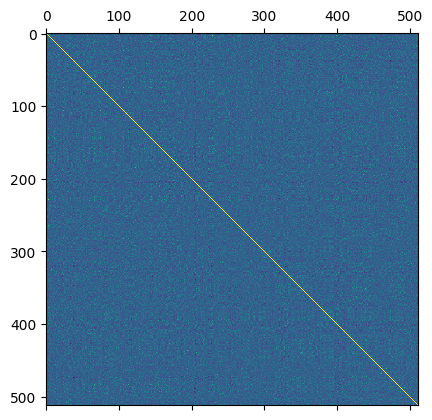

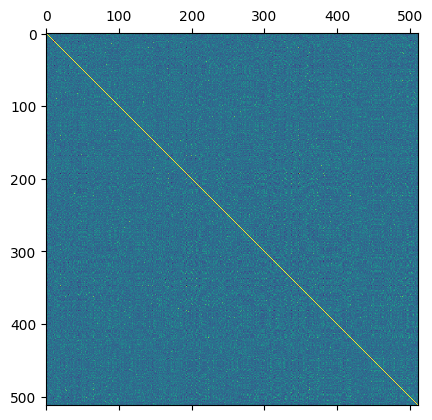

In [63]:
plt.matshow(barlow_val)
plt.matshow(lin_pred_min_val)

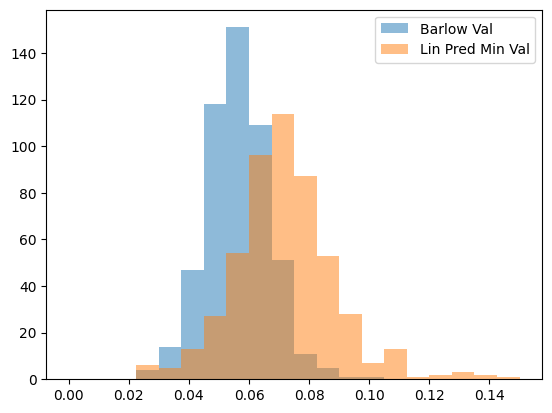

In [74]:
plt.hist(correlation_sum(barlow_val.to_numpy()), label="Barlow Val", alpha=0.5,bins=20,range=(0,0.15))
plt.hist(correlation_sum(lin_pred_min_val.to_numpy()), label="Lin Pred Min Val", alpha=0.5,bins=20,range=(0,0.15))
plt.legend()

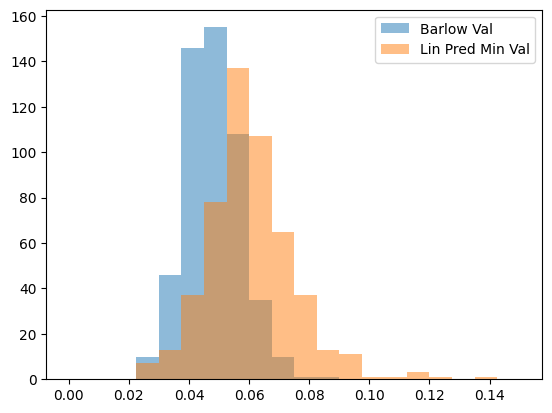

In [73]:
plt.hist(correlation_sum(barlow_train.to_numpy()), label="Barlow Val",alpha=0.5,bins=20,range=(0,0.15))
plt.hist(correlation_sum(lin_pred_min_train.to_numpy()), label="Lin Pred Min Val",alpha=0.5,bins=20,range=(0,0.15))
plt.legend()